## 【学习任务】商业异常消费数据预测

基于 chapter3_task_data.csv 数据，建立二阶多项式逻辑回归模型实现异常消费数据预测，与线性逻辑回归模型结果进行对比。  
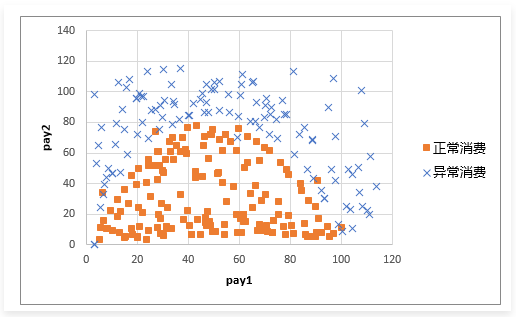

1、建立线性边界的逻辑回归模型，评估模型表现；  
2、建立二阶多项式边界的逻辑回归模型，对比其与线性边界的表现  
3、预测 pay1=70, pay2=15 时对应消费是否为异常消费  
4、获取边界函数参数、绘制边界函数  

提示：参考课程第二个实战项目完成作业，素材参见 git  

In [2]:
# load the data
import pandas as pd
import numpy as np

data = pd.read_csv('chapter3_task_data.csv')
print(data.head())
print(data.shape)

         pay1        pay2  y
0    2.946794    0.057996  1
1   10.202126    8.798162  0
2   13.962240   89.794215  1
3  106.090589   45.969875  1
4   80.713481  112.575403  1
(273, 3)


In [39]:
# Define X and y
X1 = data.loc[:, 'pay1']
X2 = data.loc[:, 'pay2']
y = data.loc[:, 'y']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
268    1
269    1
270    0
271    0
272    0
Name: y, Length: 273, dtype: int64


In [44]:
mask=data.loc[:,'y']==1
print(X1[mask])
print(X1[~mask])

0        2.946794
2       13.962240
3      106.090589
4       80.713481
8       98.059887
          ...    
262     53.447936
265     72.755304
266    109.402247
268     63.106069
269     16.319302
Name: pay1, Length: 114, dtype: float64
1      10.202126
5      37.346985
6       6.511272
7      24.327573
10     74.010161
         ...    
264    47.058939
267    88.716517
270    19.384102
271    63.468372
272    24.542177
Name: pay1, Length: 159, dtype: float64


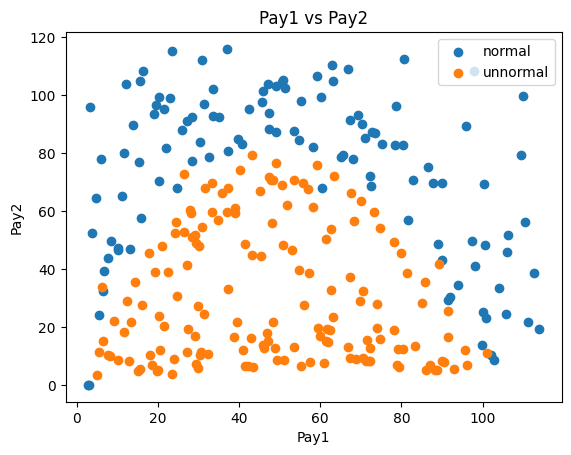

In [49]:
#visualize the data
%matplotlib inline 
from matplotlib import pyplot as plt

fig= plt.figure()
normal = plt.scatter(data.loc[:,'pay1'][mask], data.loc[:,'pay2'][mask])
unnormal = plt.scatter(data.loc[:,'pay1'][~mask], data.loc[:,'pay2'][~mask])

plt.title('Pay1 vs Pay2')
plt.xlabel('Pay1')
plt.ylabel('Pay2')
plt.legend((normal, unnormal), ('normal', 'unnormal'))

plt.show()

In [5]:
# decision boundary
# w1x1 + w2x2 + w3x1x1 + w4x2x2 + w5x1x2 + b = 0

X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2

X_new = pd.DataFrame({'X1': X1, 'X2': X2, 'X1_2': X1_2, 'X2_2': X2_2, 'X1_X2': X1_X2})
print(X_new.head())

           X1          X2          X1_2          X2_2        X1_X2
0    2.946794    0.057996      8.683594      0.003364     0.170903
1   10.202126    8.798162    104.083382     77.407648    89.759956
2   13.962240   89.794215    194.944133   8063.001119  1253.728345
3  106.090589   45.969875  11255.213180   2113.229365  4876.971089
4   80.713481  112.575403   6514.666088  12673.221428  9086.352726


In [6]:
# train the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_new, y)

c:\Users\skywa\.virtualenvs\ai_course-eMBYShh2\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# accuracy
from sklearn.metrics import accuracy_score
y_predict = LR.predict(X_new)
accuracy_score(y, y_predict)

0.967032967032967

In [54]:
# plot the decision boundary
# w1x1 + w2x2 + w3x1x1 + w4x2x2 + w5x1x2 + theta0 = 0

# ax^2 + bx + c = 0
# a = w4
# c = w1x1 + w3x1x1 + b
# b = w2 + w5x1
theta0 = LR.intercept_[0]
# w1, w2, w3, w4, w5 = LR.coef_[0, 0], LR.coef_[0, 1], LR.coef_[0, 2], LR.coef_[0, 3], LR.coef_[0, 4]
theta1, theta2, theta3,theta4,theta5 = LR.coef_[0][0],LR.coef_[0][1],LR.coef_[0][2],LR.coef_[0][3],LR.coef_[0][4]


a = theta4
b = theta2 + theta5 * X1
c = theta0 + theta1 * X1 + theta3 * X1 * X1

# x2 的二次方程的根
# x2 = (-b +- sqrt(b^2 - 4ac)) / 2a


In [61]:
# define x
def f(x):
    a = theta4
    b = theta2 + theta5 * x
    c = theta1 * x + theta3 * x * x + theta0

    x2_boundary1 = (-b - np.sqrt(b * b - 4 * a * c )) / (2 * a)
    x2_boundary2 = (-b + np.sqrt(b * b - 4 * a * c )) / (2 * a)
  
    return x2_boundary1, x2_boundary2

X1_new = X1.sort_values()
x2_boundary1_list, x2_boundary2_list = [], []
for x in X1_new:
    x2_boundary1, x2_boundary2 = f(x)
    x2_boundary1_list.append(x2_boundary1)
    x2_boundary2_list.append(x2_boundary2)
    print(x, x2_boundary1, x2_boundary2)


2.839091224 -31.685576857926044 -9.307958076560269
2.946793873 -34.182299295084555 -6.9190921886780075
3.202475763 -38.824732671636205 -2.532706055382453
3.854971013 -47.31748042900804 5.306614077529161
4.763360593 -55.96304927029773 13.0424953075392
5.107458083 -58.73926686883877 15.474123722521542
5.39221245 -60.89409445441604 17.3437900451111
5.399450013 -60.947377259739575 17.389824945414684
5.897280348 -64.45791775200553 20.401823734605728
6.235369815 -66.68961090150246 22.294944308629002
6.511272369 -68.43303619239755 23.76207279821752
6.539139911 -68.60556179569822 23.906691038562506
6.823281684 -70.32989458716469 25.346476036399363
7.794018481 -75.80566199250559 29.850119523229232
7.824464156 -75.96831796146243 29.982286312241335
8.181358928 -77.83888292177632 31.495446520489615
8.463875814 -79.27504624061302 32.6486892545575
9.273557986 -83.19691020705304 35.75971406436342
10.08650137 -86.88268584299676 38.6313846716073
10.20212634 -87.38872363315103 39.02163227098947
10.29095

C:\Users\skywa\AppData\Local\Temp\ipykernel_54992\2544151643.py:7: RuntimeWarning: invalid value encountered in sqrt
  x2_boundary1 = (-b - np.sqrt(b * b - 4 * a * c )) / (2 * a)
C:\Users\skywa\AppData\Local\Temp\ipykernel_54992\2544151643.py:8: RuntimeWarning: invalid value encountered in sqrt
  x2_boundary2 = (-b + np.sqrt(b * b - 4 * a * c )) / (2 * a)


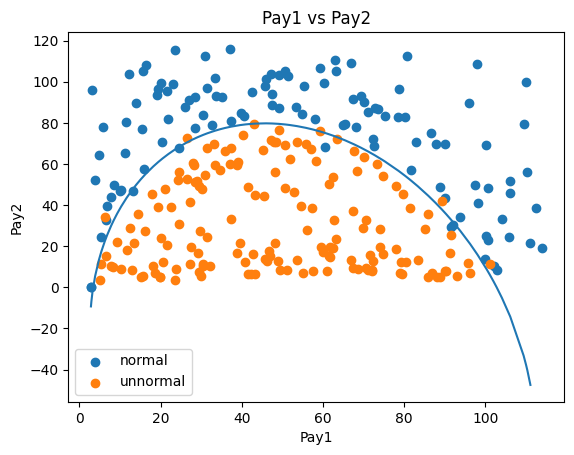

In [63]:
fig= plt.figure()
normal = plt.scatter(X1[mask], X2[mask])
unnormal = plt.scatter(X1[~mask], X2[~mask])

plt.title('Pay1 vs Pay2')
plt.xlabel('Pay1')
plt.ylabel('Pay2')
plt.legend((normal, unnormal), ('normal', 'unnormal'))

# plot the decision boundary
plt.plot(X1_new, x2_boundary2_list)

plt.show()